In [6]:

# Standard scientific Python imports
import matplotlib.pyplot as plt





SVC(C=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    gamma=[0.0001, 0.001, 0.05, 0.9, 0.5],
    kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'])

Classification report for classifier SVC(C=10, gamma=0.0001):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        88
           1       0.98      0.96      0.97        91
           2       1.00      0.98      0.99        86
           3       0.95      0.89      0.92        91
           4       0.98      0.95      0.96        92
           5       0.91      0.97      0.94        91
           6       0.99      0.99      0.99        91
           7       0.97      0.97      0.97        89
           8       0.93      0.93      0.93        88
           9       0.91      0.95      0.93        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899


Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 87  0  0  0  0  0  0  1  3]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  0 81  0  4  0  1  5  0]
 [ 1  0  0  0 87  0  0  0  0

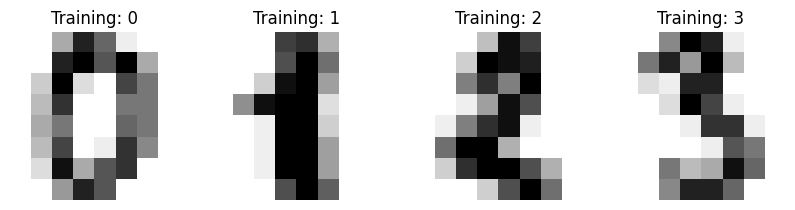

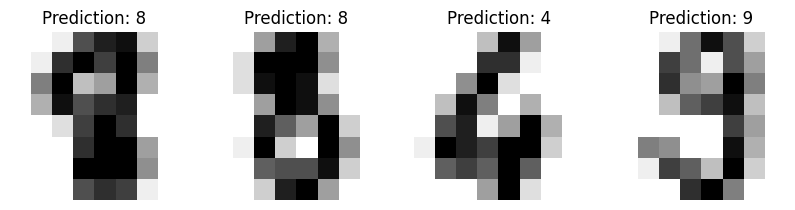

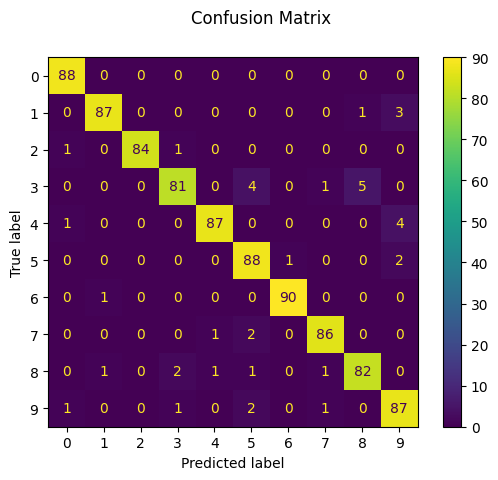

In [10]:

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)



# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# model hyperparams
GAMMA = [0.0001,0.001,0.05,0.9,0.5]
C = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

#PART: setting up hyperparameter
hyper_params = {'gamma':GAMMA, 'C':C,'kernel':kernel}
clf.set_params(**hyper_params)

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.0001,C=10)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

ACCScore = accuracy_score(y_test, predicted, normalize=False)


In [ ]:

#Sanity Check

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

###############################################################################
# Accuracy

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

###############################################################################
#Confusion Matrix

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()




Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        13
           3       0.94      1.00      0.97        16
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        16
           7       1.00      0.96      0.98        24
           8       1.00      1.00      1.00        12
           9       0.95      0.95      0.95        20

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179




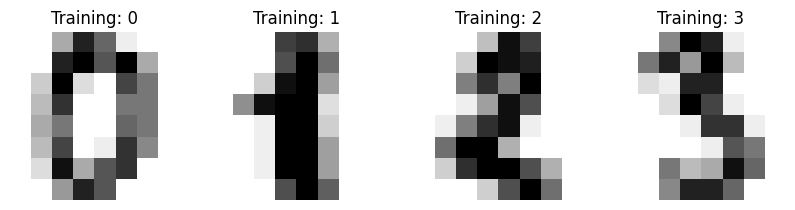

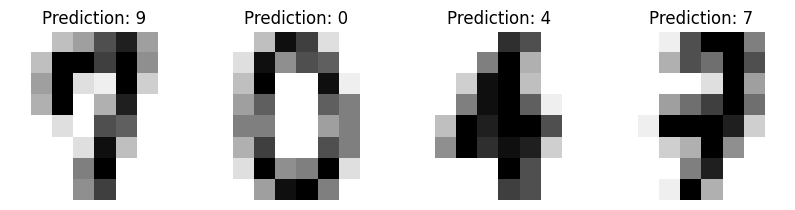

In [11]:
#PART: library dependencies -- sklear, torch, tensorflow, numpy, transformers

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


GAMMA = 0.001
train_frac = 0.8
test_frac = 0.1
dev_frac = 0.1

#PART: load dataset -- data from csv, tsv, jsonl, pickle
digits = datasets.load_digits()

#PART: sanity check visualization of the data
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


#PART: data pre-processing -- to remove some noise, to normalize data, format the data to be consumed by mode
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


#PART: define train/dev/test splits of experiment protocol
# train to train model
# dev to set hyperparameters of the model
# test to evaluate the performance of the model
dev_test_frac = 1-train_frac
X_train, X_dev_test, y_train, y_dev_test = train_test_split(
    data, digits.target, test_size=dev_test_frac, shuffle=True
)
X_test, X_dev, y_test, y_dev = train_test_split(
    X_dev_test, y_dev_test, test_size=(dev_frac)/dev_test_frac, shuffle=True
)


#PART: Define the model
# Create a classifier: a support vector classifier
clf = svm.SVC()

#PART: setting up hyperparameter
hyper_params = {'gamma':GAMMA}
clf.set_params(**hyper_params)


#PART: Train model
# Learn the digits on the train subset
clf.fit(X_train, y_train)

#PART: Get test set predictions
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

#PART: Sanity check of predictions
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

#PART: Compute evaluation metrics
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)